In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import heapq
import csvkit

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


ModuleNotFoundError: No module named 'csvkit'

In [3]:
import pandasql as ps
import sqlalchemy
# from quickchart import QuickChart
import requests
import json

In [541]:
# !pip install ipython-sql
# pip install sqlalchemy
# import sqlalchemy
# !pip install quickchart-io
!pip install requests

C:\Users\564199\AppData\Local\Programs\Python\Python39\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
C:\Users\564199\AppData\Local\Programs\Python\Python39\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=5>
C:\Users\564199\AppData\Local\Programs\Python\Python39\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=6>
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x24de1683a60>


In [431]:
df_act=pd.read_csv(r"C:\Users\564199\Downloads\final_data.csv")

In [432]:
df_act

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,2,2,1.0,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.0,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,1,1,1.0,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.2,190.0,118.0,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,2,2,1.0,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42815,13970,PID42816,Diabets,48.0,Female,No Info,3.8,122.0,90.0,100.0,...,1.3,2.2,NaN,NaN,NaN,NaN,0.0,Aetna,Urgent,11_2023
42816,21575,PID42817,Diabets,47.0,Male,not current,3.9,140.0,90.0,126.0,...,1.2,4.2,NaN,NaN,NaN,NaN,0.0,Aetna,Urgent,12_2023
42817,42194,PID42818,Cardio,42.0,1,1,1.0,110.0,70.0,1.0,...,NaN,NaN,172.0,65.0,0.0,1.0,NaN,Aetna,Elective,05_2023
42818,30510,PID42819,Lungs,60.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Urgent,05_2023


In [433]:
num_col=['Age','Choles','systolic_bp','diastolic_bp','blood_glucose_level','bmi','HbA1c_level','HDL','LDL','Height','weight']

In [434]:
df=df_act.copy()

In [435]:
df.head()

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,2,2,1.0,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.0,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,1,1,1.0,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.2,190.0,118.0,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,2,2,1.0,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42820 entries, 0 to 42819
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           42820 non-null  int64  
 1   ID                   42820 non-null  object 
 2   Disease_Type         42820 non-null  object 
 3   Age                  42820 non-null  float64
 4   Gender               40000 non-null  object 
 5   Smoke                42820 non-null  object 
 6   Choles               39970 non-null  float64
 7   systolic_bp          39961 non-null  float64
 8   diastolic_bp         39961 non-null  float64
 9   blood_glucose_level  40000 non-null  float64
 10  heart_disease        40000 non-null  float64
 11  FVC                  2820 non-null   float64
 12  FEC1                 2820 non-null   float64
 13  PEFR                 2820 non-null   object 
 14  O2                   2820 non-null   object 
 15  ABG-P-O2             2820 non-null  

In [437]:
df.describe()

,Unnamed: 0,Age,Choles,systolic_bp,diastolic_bp,blood_glucose_level,heart_disease,FVC,FEC1,hypertension,bmi,HbA1c_level,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes
count,42820.0000,42820.000000,39970.000000,39961.000000,39961.000000,40000.000000,40000.000000,2820.000000,2820.000000,30000.000000,30000.000000,30000.000000,29970.000000,29970.000000,10000.000000,10000.000000,10000.000000,10000.000000,30000.000000
mean,21409.5000,45.984690,3.589985,134.324642,86.916594,104.141150,0.155100,3.281574,4.568702,0.075433,27.363115,5.524403,1.228619,2.627453,164.308200,74.303710,0.053700,0.797200,0.087600
std,12361.2136,20.370665,1.740384,61.745267,104.495876,69.182875,0.362005,0.870652,11.757416,0.264094,6.709472,1.076484,0.537688,1.002780,8.178796,14.566353,0.225436,0.402105,0.282717
min,0.0000,0.080000,0.000000,-100.000000,0.000000,1.000000,0.000000,1.440000,0.960000,0.000000,10.190000,3.500000,0.200000,0.300000,70.000000,30.000000,0.000000,0.000000,0.000000
25%,10704.7500,32.000000,2.900000,120.000000,75.000000,60.750000,0.000000,2.600000,1.960000,0.000000,23.620000,4.800000,0.900000,1.900000,159.000000,65.000000,0.000000,1.000000,0.000000
50%,21409.5000,50.000000,3.800000,130.000000,80.000000,126.000000,0.000000,3.160000,2.400000,0.000000,27.320000,5.800000,1.100000,2.600000,165.000000,72.000000,0.000000,1.000000,0.000000
75%,32114.2500,60.000000,4.600000,142.000000,90.000000,158.000000,0.000000,3.810000,3.080000,0.000000,29.620000,6.200000,1.300000,3.300000,170.000000,82.000000,0.000000,1.000000,0.000000
max,42819.0000,87.000000,10.300000,11500.000000,10000.000000,300.000000,1.000000,6.300000,86.300000,1.000000,95.690000,9.000000,9.900000,9.900000,250.000000,200.000000,1.000000,1.000000,1.000000


In [438]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Disease_Type               0
Age                        0
Gender                  2820
Smoke                      0
Choles                  2850
systolic_bp             2859
diastolic_bp            2859
blood_glucose_level     2820
heart_disease           2820
FVC                    40000
FEC1                   40000
PEFR                   40000
O2                     40000
ABG-P-O2               40000
ABG-P-CO2              40000
ABG-pH Level           40000
Scan                   40000
Asthama                40000
Other_diseaes          40000
Lungs_disease          40000
hypertension           12820
bmi                    12820
HbA1c_level            12820
HDL                    12850
LDL                    12850
Height                 32820
weight                 32820
Alcohol                32820
Physical_activity      32820
Diabetes               12820
Insurance_Provider         0
Admission_Type             0
admission_date

In [439]:
# fig = plt.figure(figsize=(10,5))
# sns.boxplot(x=df['Gender'],y=df['weight']);
# plt.show()

In [440]:
df['Gender'].replace(['1','2'],['Female','Male'],inplace=True)

In [441]:
df['Gender'].value_counts()

Female    24233
Male      15762
Other         5
Name: Gender, dtype: int64

In [442]:
df['Choles'].value_counts()

1.00    7487
4.90    2260
4.20    1965
4.30    1916
3.00    1713
        ... 
8.10       2
2.10       2
9.90       2
9.30       2
6.12       1
Name: Choles, Length: 78, dtype: int64

In [443]:
new_min = 3.9
new_max = 5.5
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
df['Choles'] = df.apply(lambda row: np.random.uniform(new_min, new_max) if row['Choles'] == 1 else row['Choles'], axis=1)

In [444]:
df.head()

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.307065,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.000000,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,Female,1,4.296806,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.200000,190.0,118.0,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,Male,2,5.173650,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023


In [445]:
df['Choles'].value_counts()

4.900000    2260
4.200000    1965
4.300000    1916
3.000000    1713
3.700000    1649
            ... 
4.717886       1
3.925451       1
4.076006       1
4.155554       1
5.074162       1
Name: Choles, Length: 7564, dtype: int64

In [446]:
new_min = 5.6
new_max = 7.9
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
df['Choles'] = df.apply(lambda row: np.random.uniform(new_min, new_max) if row['Choles'] == 2 else row['Choles'], axis=1)

In [447]:
df.loc[df['Choles'] == 2]

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date


In [448]:
new_min = 8
new_max = 10
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
df['Choles'] = df.apply(lambda row: np.random.uniform(new_min, new_max) if row['Choles'] == 3 else row['Choles'], axis=1)

In [449]:
df.loc[df['Choles'] == 3]

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date


In [450]:
df_no_null = df[df['systolic_bp'].notna()]

In [451]:
df_no_null

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.307065,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.000000,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,Female,1,4.296806,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.200000,190.0,118.0,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,Male,2,5.173650,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42814,23494,PID42815,Diabets,41.0,Female,No Info,4.300000,140.0,86.0,145.0,...,1.1,4.2,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,04_2023
42815,13970,PID42816,Diabets,48.0,Female,No Info,3.800000,122.0,90.0,100.0,...,1.3,2.2,NaN,NaN,NaN,NaN,0.0,Aetna,Urgent,11_2023
42816,21575,PID42817,Diabets,47.0,Male,not current,3.900000,140.0,90.0,126.0,...,1.2,4.2,NaN,NaN,NaN,NaN,0.0,Aetna,Urgent,12_2023
42817,42194,PID42818,Cardio,42.0,Female,1,5.074162,110.0,70.0,1.0,...,NaN,NaN,172.0,65.0,0.0,1.0,NaN,Aetna,Elective,05_2023


In [452]:
42820-39961

2859

In [453]:
df_null = df[df['systolic_bp'].isna()]

In [454]:
df_null

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
19,31799,PID20,Lungs,48.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Emergency,09_2023
30,30053,PID31,Lungs,75.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,Emergency,03_2023
49,30366,PID50,Lungs,62.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aetna,Urgent,04_2023
65,31516,PID66,Lungs,55.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Elective,09_2023
69,32592,PID70,Lungs,75.0,NaN,T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Elective,11_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42807,30525,PID42808,Lungs,65.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aetna,Elective,02_2023
42810,32076,PID42811,Lungs,68.0,NaN,T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Emergency,10_2023
42811,30877,PID42812,Lungs,67.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,Urgent,07_2023
42813,31767,PID42814,Lungs,70.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Elective,09_2023


In [455]:
def treat_outlier(col):
    Q1  = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [456]:
num_col2=['systolic_bp','diastolic_bp']
for column in num_col2:
    lr,ur =treat_outlier(df_no_null[column])
    print('Lower Range :',lr,'\nUpper Range :',ur)
    if (ur >= 0):
        df_no_null[column]=np.where(df_no_null[column]>ur,ur,df_no_null[column])
        print('Upper range is adjusted for columns : '+ column)
    if (lr >= 0):
        df_no_null[column]=np.where(df_no_null[column]<lr,lr,df_no_null[column])
        print('lower range is adjusted for columns : '+ column)

Lower Range : 87.0 
Upper Range : 175.0
Upper range is adjusted for columns : systolic_bp
lower range is adjusted for columns : systolic_bp
Lower Range : 52.5 
Upper Range : 112.5
Upper range is adjusted for columns : diastolic_bp
lower range is adjusted for columns : diastolic_bp


C:\Users\564199\AppData\Local\Temp\ipykernel_7564\2987286769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\564199\AppData\Local\Temp\ipykernel_7564\2987286769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\564199\AppData\Local\Temp\ipykernel_7564\2987286769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<Axes: ylabel='systolic_bp'>

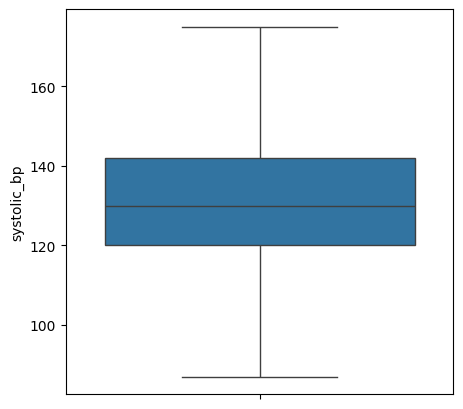

In [457]:
fig = plt.figure(figsize=(5,5))
fig.set_size_inches(5, 5)
sns.boxplot(df_no_null['systolic_bp'],whis=1.5)

<Axes: ylabel='diastolic_bp'>

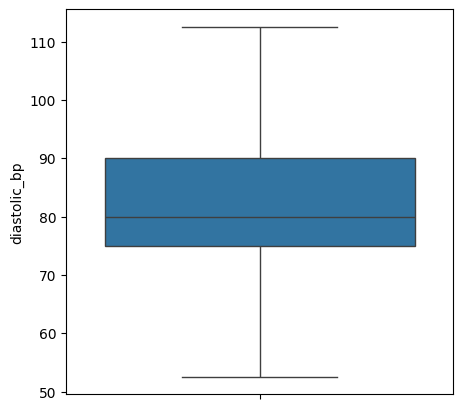

In [458]:
fig = plt.figure(figsize=(5,5))
fig.set_size_inches(5, 5)
sns.boxplot(df_no_null['diastolic_bp'],whis=1.5)

In [459]:
final_df=pd.concat([df_no_null, df_null], axis=0)

In [460]:
final_df

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.307065,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.000000,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,Female,1,4.296806,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.200000,175.0,112.5,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,Male,2,5.173650,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42807,30525,PID42808,Lungs,65.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aetna,Elective,02_2023
42810,32076,PID42811,Lungs,68.0,NaN,T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Emergency,10_2023
42811,30877,PID42812,Lungs,67.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,Urgent,07_2023
42813,31767,PID42814,Lungs,70.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Elective,09_2023


In [461]:
final_df.sample(frac=1)

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
34281,23042,PID34282,Diabets,23.0,Female,current,4.300000,105.0,82.0,200.0,...,0.9,2.4,NaN,NaN,NaN,NaN,0.0,Aetna,Elective,08_2023
624,22164,PID625,Diabets,21.0,Female,never,4.500000,119.0,68.0,158.0,...,1.8,1.8,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,11_2023
1161,25000,PID1162,Diabets,72.0,Male,never,6.700000,140.0,87.0,240.0,...,0.9,5.0,NaN,NaN,NaN,NaN,1.0,Medicare,Urgent,03_2023
41512,37303,PID41513,Cardio,62.0,Male,2,8.511704,140.0,90.0,1.0,...,NaN,NaN,170.0,74.0,0.0,1.0,NaN,Aetna,Urgent,12_2023
28461,3121,PID28462,Diabets,47.0,Female,No Info,6.500000,111.0,62.0,85.0,...,0.9,4.9,NaN,NaN,NaN,NaN,0.0,Aetna,Elective,01_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,38489,PID29016,Cardio,60.0,Male,2,9.767132,150.0,100.0,1.0,...,NaN,NaN,169.0,105.0,0.0,1.0,NaN,Aetna,Elective,07_2023
10595,10877,PID10596,Diabets,53.0,Male,current,4.100000,130.0,72.0,159.0,...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,UnitedHealthcare,Emergency,09_2023
22392,24435,PID22393,Diabets,62.0,Female,current,2.800000,108.0,58.0,130.0,...,0.8,3.8,NaN,NaN,NaN,NaN,0.0,Aetna,Urgent,08_2023
12644,13526,PID12645,Diabets,43.0,Female,never,5.000000,142.0,100.0,80.0,...,1.2,3.3,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,11_2023


In [462]:
final_df

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.307065,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.000000,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,Female,1,4.296806,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.200000,175.0,112.5,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,Male,2,5.173650,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42807,30525,PID42808,Lungs,65.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aetna,Elective,02_2023
42810,32076,PID42811,Lungs,68.0,NaN,T,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Emergency,10_2023
42811,30877,PID42812,Lungs,67.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medicare,Urgent,07_2023
42813,31767,PID42814,Lungs,70.0,NaN,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cigna,Elective,09_2023


In [463]:
 final_df.loc[final_df['blood_glucose_level'] == 1]

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.307065,130.0,60.0,1.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
2,38171,PID3,Cardio,41.0,Female,1,4.296806,133.0,86.0,1.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
4,35015,PID5,Cardio,60.0,Male,2,5.173650,120.0,80.0,1.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023
6,33749,PID7,Cardio,63.0,Female,1,4.436293,110.0,70.0,1.0,...,NaN,NaN,156.0,54.0,0.0,0.0,NaN,Medicare,Emergency,10_2023
7,33921,PID8,Cardio,46.0,Female,1,5.634921,130.0,95.0,1.0,...,NaN,NaN,162.0,74.0,0.0,1.0,NaN,Aetna,Urgent,04_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42803,33350,PID42804,Cardio,53.0,Male,2,4.243487,120.0,80.0,1.0,...,NaN,NaN,165.0,68.0,0.0,1.0,NaN,UnitedHealthcare,Urgent,05_2023
42805,41802,PID42806,Cardio,41.0,Female,1,4.025186,120.0,70.0,1.0,...,NaN,NaN,185.0,70.0,0.0,1.0,NaN,Medicare,Urgent,07_2023
42809,32901,PID42810,Cardio,52.0,Female,1,4.161452,120.0,70.0,1.0,...,NaN,NaN,155.0,64.0,0.0,1.0,NaN,Medicare,Emergency,07_2023
42812,34677,PID42813,Cardio,64.0,Female,1,4.129546,120.0,80.0,1.0,...,NaN,NaN,157.0,60.0,1.0,1.0,NaN,Blue Cross,Urgent,07_2023


In [464]:
new_min = 70
new_max = 120
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
final_df['blood_glucose_level'] = final_df.apply(lambda row: np.random.uniform(new_min, new_max) if row['blood_glucose_level'] == 1 else row['blood_glucose_level'], axis=1)

In [465]:
new_min = 130
new_max = 200
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
final_df['blood_glucose_level'] = final_df.apply(lambda row: np.random.uniform(new_min, new_max) if row['blood_glucose_level'] == 2 else row['blood_glucose_level'], axis=1)

In [466]:
new_min = 200
new_max = 300
# df['Choles'] = df['Choles'].apply(lambda x: (x - 1) * (new_max - new_min) / (1 - 0) + new_min if x == 1 else x)
final_df['blood_glucose_level'] = final_df.apply(lambda row: np.random.uniform(new_min, new_max) if row['blood_glucose_level'] == 3 else row['blood_glucose_level'], axis=1)

In [467]:
final_df['Choles']=final_df['Choles'].round(1)

In [468]:
final_df['blood_glucose_level']=final_df['blood_glucose_level'].round(0)

In [469]:
final_df['Smoke'].replace(['F','T'],['not current','current'],inplace=True)

In [470]:
final_df['Smoke'].value_counts()

No Info        10673
never          10563
1               6546
not current     4417
2               3454
current         3090
former          2794
ever            1283
Name: Smoke, dtype: int64

In [471]:
final_df['Disease_Type'].value_counts()

Diabets    30000
Cardio     10000
Lungs       2820
Name: Disease_Type, dtype: int64

In [472]:
df_cardio=final_df[final_df['Disease_Type']=='Cardio']

In [473]:
df_Diabetes=final_df[final_df['Disease_Type']=='Diabets']

In [474]:
df_Lungs=final_df[final_df['Disease_Type']=='Lungs']

In [475]:
len(df_cardio.index)

10000

In [476]:
len(df_Diabetes.index)

30000

In [477]:
len(df_Lungs.index)

2820

In [478]:
final_df.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\final.csv')

In [479]:
df_cardio.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\cardio.csv')

In [480]:
df_Diabetes.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\diabetes.csv')

In [481]:
df_Lungs.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\lungs.csv')

In [482]:
gender_choices = ['Male', 'Female'] 
final_df['Gender'] = final_df['Gender'].apply(lambda x: np.random.choice(gender_choices) if pd.isnull(x) else x) # Display the updated DataFrameprint(df) has context menu

In [483]:
final_df['Gender'].isnull().sum()

0

In [484]:
final_df.head()

,Unnamed: 0,ID,Disease_Type,Age,Gender,Smoke,Choles,systolic_bp,diastolic_bp,blood_glucose_level,...,HDL,LDL,Height,weight,Alcohol,Physical_activity,Diabetes,Insurance_Provider,Admission_Type,admission_date
0,38562,PID1,Cardio,64.0,Male,2,5.3,130.0,60.0,86.0,...,NaN,NaN,164.0,96.0,0.0,0.0,NaN,Cigna,Urgent,09_2023
1,29710,PID2,Diabets,26.0,Male,No Info,4.0,135.0,75.0,130.0,...,0.9,2.6,NaN,NaN,NaN,NaN,0.0,Medicare,Elective,03_2023
2,38171,PID3,Cardio,41.0,Female,1,4.3,133.0,86.0,101.0,...,NaN,NaN,160.0,93.0,0.0,0.0,NaN,UnitedHealthcare,Elective,05_2023
3,13609,PID4,Diabets,8.0,Male,No Info,3.2,175.0,112.5,126.0,...,1.6,0.9,NaN,NaN,NaN,NaN,0.0,Blue Cross,Elective,10_2023
4,35015,PID5,Cardio,60.0,Male,2,5.2,120.0,80.0,118.0,...,NaN,NaN,168.0,75.0,0.0,1.0,NaN,Cigna,Urgent,09_2023


In [485]:
final_df.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\final2.csv')

In [486]:
df_cardio=final_df[final_df['Disease_Type']=='Cardio']

In [487]:
df_Diabetes=final_df[final_df['Disease_Type']=='Diabets']

In [488]:
df_Lungs=final_df[final_df['Disease_Type']=='Lungs']

In [489]:
df_cardio.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\cardio2.csv')

In [490]:
df_Diabetes.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\diabetes2.csv')

In [491]:
df_Lungs.to_csv(r'C:\Users\564199\OneDrive - Cognizant\Desktop\Hack\lungs2.csv')

In [4]:
# Load the SQL extension
%load_ext sql  

The sql module is not an IPython extension.


C:\Users\Admin\Documents\hackathon\sql.py:22: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(r'final2.csv')


In [5]:
# Create a SQLite connection
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db')

In [6]:
# Connect to the SQLite database
%sql sqlite:///mydatabase.db

UsageError: Line magic function `%sql` not found.


In [8]:
final_df = pd.read_csv(r'final2.csv')
df_cardio = pd.read_csv(r'cardio2.csv')
df_Diabetes = pd.read_csv(r'diabetes2.csv')
df_Lungs = pd.read_csv(r'lungs2.csv')

<ipython-input-8-4d5bcde0b216>:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(r'final2.csv')


In [9]:
final_df.to_sql('data', con=engine, if_exists='replace')

42820

In [10]:
df_cardio.to_sql('cardio', con=engine, if_exists='replace')

10000

In [11]:
df_Diabetes.to_sql('deiabetes', con=engine, if_exists='replace')


30000

In [12]:
df_Lungs.to_sql('lungs', con=engine, if_exists='replace')


2820

In [13]:
# Admission_Type_result = %sql SELECT Admission_Type FROM data;
# Admission_Type_result
# Admission_Type_result[0:5]
# Admission_list = [item for tuple in Admission_Type_result for item in tuple]
# len(Admission_list)
# int_df=pd.DataFrame()
# int_df['Admission_Type']=Admission_list

In [500]:
# from quickchart import QuickChart

# qc = QuickChart()
# qc.width = 500
# qc.height = 300

# # Config can be set as a string or as a nested dict
# qc.config = """{
#   type: 'bar',
#   data: {
#     labels: ['Q1', 'Q2', 'Q3', 'Q4'],
#     datasets: [{
#       label: 'Admission_Type',
#       data: [50, 60, 70, 180]
#     }]
#   }
# }"""

# # You can get the chart URL...
# print(qc.get_url())

# # Get the image as a variable...
# # image = qc.get_url()
# # print(image)
# # print(qc.get_short_url())

# # Or write the chart to a file
# # qc.to_file('mychart.png')

In [501]:
from IPython.core.getipython import get_ipython
def univariate(query,data_column):
    ipython=get_ipython()
    result = ipython.run_line_magic('sql',query)
    # print(type(result))
    # print(result[0:5])
    result_list=[]
    result_list = [item for tuple in result for item in tuple]
    df=pd.DataFrame()
    df[data_column]=result_list
    # print(df.head())
    return df

def bardata(df):
    data_count_list=[]
    data_list=[]
    count_list=[]
    data_count_list = df.iloc[:,0].value_counts().reset_index().values.tolist()
    data_list,count_list=zip(*data_count_list)
    return data_list,count_list

In [502]:
def chart_url_bar(data_list,count_list,label):
    qc = QuickChart()
    qc.width = 500
    qc.height = 300

    # Config can be set as a string or as a nested dict
    structure = {
       'type': 'bar',
       'data': {
           'labels': data_list,
           'datasets': [
               {'label': label, 'data': count_list},
           ]
       }
    }

    # print(structure)

    qc.config = dict(structure)
    print(qc.config)

    # You can get the chart URL...
    print(qc.get_url())

    # Get the image as a variable...
    # image = qc.get_url()
    # print(image)
    # print(qc.get_short_url())

    # Or write the chart to a file
    # qc.to_file('mychart.png')

In [503]:
def chart_url_pie(data_list,count_list,label):
    qc = QuickChart()
    qc.width = 500
    qc.height = 300

    # Config can be set as a string or as a nested dict
    structure = {
       'type': 'pie',
       'data': {
           'labels': data_list,
           'datasets': [
               {'label': label, 'data': count_list},
           ]
       }
    }

    # print(structure)

    qc.config = dict(structure)
    print(qc.config)

    # You can get the chart URL...
    print(qc.get_url())

    # Get the image as a variable...
    # image = qc.get_url()
    # print(image)
    # print(qc.get_short_url())

    # Or write the chart to a file
    # qc.to_file('mychart.png')

In [570]:
def chart_url_line(data_list,count_list1,count_list2,count_list3,label1,label2,label3):
    # print(data_list)
    # print(count_list1)
    # print(count_list2)
    # print(count_list3)
    # print(label1)
    # print(label2)
    # print(label3)
    qc = QuickChart()
    qc.width = 500
    qc.height = 300

    # Config can be set as a string or as a nested dict
    config = {
       'type': 'line',
       'data': {
           'labels': data_list,
           'datasets': [
               {'label': label1, 'data': count_list1,'fill':'false','borderColor':'blue'},
               {'label': label2, 'data': count_list2,'fill':'false','borderColor':'green'},
               {'label': label3, 'data': count_list3,'fill':'false','borderColor':'green'},
           ]
       }
    }

    # config={'type': 'line', 'data': {'labels': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],'datasets': [{'label': 'Cardio', 'data': ['585', '1707', '555', '578', '1111', '558', '1661', '526', '524', '584', '575', '1036'], 'fill': 'false', 'borderColor': 'blue'}]}}
    # print(config)

    # postdata = {
    #   'chart': json.dumps(config),
    #   'width': 500,
    #   'height': 300,
    #   'backgroundColor': 'transparent',
    # }

    # resp = requests.post('https://quickchart.io/chart/create', json=postdata)
    # parsed = json.loads(resp.text)
    # print(parsed['url'])

    qc.config = dict(config)
    print(qc.config)

    print(qc.get_url())

    # Get the image as a variable...
    # image = qc.get_url()
    # print(image)
    # print(qc.get_short_url())

    # Or write the chart to a file
    # qc.to_file('mychart.png')

In [592]:
def chart_url_box(data_list,count_list,label):
    qc = QuickChart()
    qc.width = 500
    qc.height = 300

    # Config can be set as a string or as a nested dict
    structure = {
       'type': 'boxplot',
       'data': {
           'labels': data_list,
           'datasets': [
               {'label': label, 'data': [count_list]},
           ]
       },
        'options': {
            'width': 800,
            'height': 400
        }
    }

    print(structure)

    qc.config = dict(structure)
    # print(qc.config)

    # You can get the chart URL...
    print(qc.get_url())

In [505]:
int_df=univariate("SELECT Admission_Type FROM data","Admission_Type")
# plt.figure(figsize=(10,6))
# sns.countplot(x=int_df.iloc[:,0], data=int_df)
# plt.show()
data_list,count_list=bardata(int_df)
data_list=list(data_list)
count_list=list(count_list)
print(data_list)
print(count_list)
chart_url_bar(data_list,count_list,"Admission_Type")

 * sqlite:///mydatabase.db
Done.
['Elective', 'Emergency', 'Urgent']
[24447, 12220, 6153]
{'type': 'bar', 'data': {'labels': ['Elective', 'Emergency', 'Urgent'], 'datasets': [{'label': 'Admission_Type', 'data': [24447, 12220, 6153]}]}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22bar%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22Elective%22%2C%22Emergency%22%2C%22Urgent%22%5D%2C%22datasets%22%3A%5B%7B%22label%22%3A%22Admission_Type%22%2C%22data%22%3A%5B24447%2C12220%2C6153%5D%7D%5D%7D%7D&w=500&h=300&bkg=%23ffffff&devicePixelRatio=1.0&f=png&v=2.9.4


In [506]:
int_df=univariate("SELECT Insurance_Provider FROM data","Insurance_Provider")
# plt.figure(figsize=(10,6))
# sns.countplot(x=int_df.iloc[:,0], data=int_df)
# plt.show()
data_list,count_list=bardata(int_df)
data_list=list(data_list)
count_list=list(count_list)
print(data_list)
print(count_list)
chart_url_bar(data_list,count_list,"Insurance_Provider")

 * sqlite:///mydatabase.db
Done.
['Cigna', 'Aetna', 'Medicare', 'Blue Cross', 'UnitedHealthcare']
[16004, 10728, 8030, 5367, 2691]
{'type': 'bar', 'data': {'labels': ['Cigna', 'Aetna', 'Medicare', 'Blue Cross', 'UnitedHealthcare'], 'datasets': [{'label': 'Insurance_Provider', 'data': [16004, 10728, 8030, 5367, 2691]}]}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22bar%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22Cigna%22%2C%22Aetna%22%2C%22Medicare%22%2C%22Blue+Cross%22%2C%22UnitedHealthcare%22%5D%2C%22datasets%22%3A%5B%7B%22label%22%3A%22Insurance_Provider%22%2C%22data%22%3A%5B16004%2C10728%2C8030%2C5367%2C2691%5D%7D%5D%7D%7D&w=500&h=300&bkg=%23ffffff&devicePixelRatio=1.0&f=png&v=2.9.4


In [507]:
nt_df=univariate("SELECT Insurance_Provider FROM data","Insurance_Provider")
# plt.figure(figsize=(10,6))
# sns.countplot(x=int_df.iloc[:,0], data=int_df)
# plt.show()
data_list,count_list=bardata(int_df)
data_list=list(data_list)
count_list=list(count_list)
print(data_list)
print(count_list)
chart_url_pie(data_list,count_list,"Insurance_Provider")

 * sqlite:///mydatabase.db
Done.
['Cigna', 'Aetna', 'Medicare', 'Blue Cross', 'UnitedHealthcare']
[16004, 10728, 8030, 5367, 2691]
{'type': 'pie', 'data': {'labels': ['Cigna', 'Aetna', 'Medicare', 'Blue Cross', 'UnitedHealthcare'], 'datasets': [{'label': 'Insurance_Provider', 'data': [16004, 10728, 8030, 5367, 2691]}]}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22pie%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22Cigna%22%2C%22Aetna%22%2C%22Medicare%22%2C%22Blue+Cross%22%2C%22UnitedHealthcare%22%5D%2C%22datasets%22%3A%5B%7B%22label%22%3A%22Insurance_Provider%22%2C%22data%22%3A%5B16004%2C10728%2C8030%2C5367%2C2691%5D%7D%5D%7D%7D&w=500&h=300&bkg=%23ffffff&devicePixelRatio=1.0&f=png&v=2.9.4


In [594]:
int_df=univariate("SELECT Age FROM data","Age")
# fig, ax = plt.subplots(1,2, figsize= (15,5))
# fig.suptitle(" boxplot & distribution of AGE ", fontsize= 15)

# sns.boxplot(int_df['Age'], ax = ax[0])

# sns.distplot(int_df['Age'], kde = True, hist=True, ax = ax[1])
# plt.show()
inp_list=list(int_df['Age'])
# print(inp_list[0:10])
chart_url_box(['Age'],inp_list[0:10],'Age')

 * sqlite:///mydatabase.db
Done.
{'type': 'boxplot', 'data': {'labels': ['Age'], 'datasets': [{'label': 'Age', 'data': [[64.0, 26.0, 41.0, 8.0, 60.0, 38.0, 63.0, 46.0, 8.0, 49.0]]}]}, 'options': {'width': 800, 'height': 400}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22boxplot%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22Age%22%5D%2C%22datasets%22%3A%5B%7B%22label%22%3A%22Age%22%2C%22data%22%3A%5B%5B64.0%2C26.0%2C41.0%2C8.0%2C60.0%2C38.0%2C63.0%2C46.0%2C8.0%2C49.0%5D%5D%7D%5D%7D%2C%22options%22%3A%7B%22width%22%3A800%2C%22height%22%3A400%7D%7D&w=500&h=300&bkg=%23ffffff&devicePixelRatio=1.0&f=png&v=2.9.4


In [509]:
int_df=univariate("SELECT Gender FROM data","Gender")
# plt.figure(figsize=(10,6))
# sns.countplot(x='Gender', data=final_df)
# plt.show()
data_list,count_list=bardata(int_df)
data_list=list(data_list)
count_list=list(count_list)
print(data_list)
print(count_list)
chart_url_bar(data_list,count_list,"Gender")

 * sqlite:///mydatabase.db
Done.
['Female', 'Male', 'Other']
[25671, 17144, 5]
{'type': 'bar', 'data': {'labels': ['Female', 'Male', 'Other'], 'datasets': [{'label': 'Gender', 'data': [25671, 17144, 5]}]}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22bar%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22Female%22%2C%22Male%22%2C%22Other%22%5D%2C%22datasets%22%3A%5B%7B%22label%22%3A%22Gender%22%2C%22data%22%3A%5B25671%2C17144%2C5%5D%7D%5D%7D%7D&w=500&h=300&bkg=%23ffffff&devicePixelRatio=1.0&f=png&v=2.9.4


In [1]:
int_df=multivar("SELECT Disease_Type, admission_date FROM data",["Disease_Type","admission_date"])

# int_df.head()
int_df['admission_date'] = pd.to_datetime(int_df['admission_date'], format='%m_%Y')
int_df['month_of_admission'] = int_df['admission_date'].dt.strftime('%B')
int_df.head()
# fig = plt.figure(figsize=(10,5))
# sns.boxplot(x=final_df['Gender'],y=final_df['Age'],hue=final_df['heart_disease']);
# plt.show()
# sns.boxplot(x=int_df['Gender'],y=int_df['Age'],hue=int_df['heart_disease']);
# plt.show()

NameError: name 'multivar' is not defined

In [569]:
result = int_df.groupby(['Disease_Type', 'month_of_admission']).size().reset_index(name='patient_count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
result['month_of_admission'] = pd.Categorical(result['month_of_admission'], categories=month_order, ordered=True)
result = result.sort_values(['Disease_Type','month_of_admission'])
# print(result)
unique_diseases = result['Disease_Type'].unique()
print('unique_diseases',unique_diseases)
disease_lists = {}
for disease in unique_diseases:
   disease_df = result[result['Disease_Type'] == disease]
   disease_counts = [disease_df[disease_df['month_of_admission'] == month]['patient_count'].values[0] if month in disease_df['month_of_admission'].values else 0 for month in month_order]
   disease_lists[disease] = disease_counts
list_int1=list(disease_lists.values())[0]
list_int2=list(disease_lists.values())[1]
list_int3=list(disease_lists.values())[2]
list_of_strings1 = [str(num) for num in list_int1]
list_of_strings2 = [str(num) for num in list_int2]
list_of_strings3 = [str(num) for num in list_int3]
chart_url_line(month_order,list_of_strings1,list_of_strings2,list_of_strings3,list(disease_lists.keys())[0],list(disease_lists.keys())[1],list(disease_lists.keys())[2])

unique_diseases ['Cardio' 'Diabets' 'Lungs']
{'type': 'line', 'data': {'labels': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 'datasets': [{'label': 'Cardio', 'data': ['585', '1707', '555', '578', '1111', '558', '1661', '526', '524', '584', '575', '1036'], 'fill': 'false', 'borderColor': 'blue'}, {'label': 'Diabets', 'data': ['3128', '1620', '1659', '1565', '3105', '1528', '1544', '1660', '1683', '1588', '4750', '6170'], 'fill': 'false', 'borderColor': 'green'}, {'label': 'Lungs', 'data': ['122', '130', '326', '128', '109', '126', '137', '143', '854', '484', '143', '118'], 'fill': 'false', 'borderColor': 'green'}]}}
https://quickchart.io/chart?c=%7B%22type%22%3A%22line%22%2C%22data%22%3A%7B%22labels%22%3A%5B%22January%22%2C%22February%22%2C%22March%22%2C%22April%22%2C%22May%22%2C%22June%22%2C%22July%22%2C%22August%22%2C%22September%22%2C%22October%22%2C%22November%22%2C%22December%22%5D%2C%22datasets%22%3A%5

In [563]:
from IPython.core.getipython import get_ipython
def multivar(query,data_columns):
    ipython=get_ipython()
    result = ipython.run_line_magic('sql',query)
    # print(type(result))
    print(result[0:5])
    df=pd.DataFrame(result,columns=data_columns)
    # print(df.head(20))
    return df

 * sqlite:///mydatabase.db
Done.
[('Male', 64.0, 1.0), ('Male', 26.0, 0.0), ('Female', 41.0, 0.0), ('Male', 8.0, 0.0), ('Male', 60.0, 0.0)]


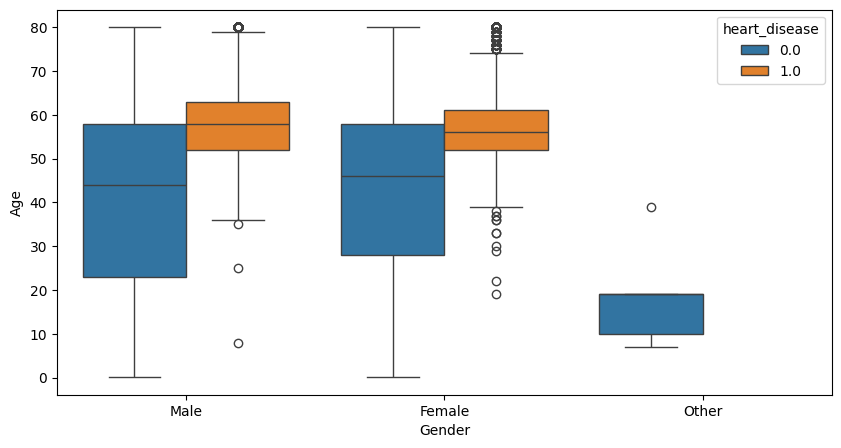

In [564]:
int_df=multivar("SELECT Gender, Age, heart_disease FROM data",["Gender","Age","heart_disease"])
fig = plt.figure(figsize=(10,5))
# sns.boxplot(x=final_df['Gender'],y=final_df['Age'],hue=final_df['heart_disease']);
# plt.show()
sns.boxplot(x=int_df['Gender'],y=int_df['Age'],hue=int_df['heart_disease']);
plt.show()

In [ ]:
# int_df=multivar("SELECT Gender, Age, heart_disease FROM data",["Gender","Age","heart_disease"])
# fig = plt.figure(figsize=(10,5))
# # sns.boxplot(x=final_df['Gender'],y=final_df['Age'],hue=final_df['heart_disease']);
# # plt.show()
# sns.distplot(x=int_df['Gender'],y=int_df['Age'],hue=int_df['heart_disease']);
# plt.show()



In [ ]:
int_df=multivar("SELECT Gender, Age, Diabetes FROM data",["Gender","Age","Diabetes"])
fig = plt.figure(figsize=(10,5))
sns.boxplot(x=int_df['Gender'],y=int_df['Age'],hue=int_df['Diabetes']);
plt.show()

In [ ]:
data = pd.crosstab(final_df['Gender'],final_df['heart_disease'])
data.div(data.sum(1).astype('int'),axis = 0).plot(kind = 'bar', stacked = True, figsize = (6, 5), \
                                                      color = ['skyblue', 'darkblue'])

In [ ]:
data = pd.crosstab(final_df['Gender'],final_df['Diabetes'])
data.div(data.sum(1).astype('int'),axis = 0).plot(kind = 'bar', stacked = True, figsize = (6, 5), \
                                                      color = ['skyblue', 'darkblue'])

In [ ]:
final_df['Gender'].isnull().sum()

In [ ]:
# Creating a scatter plot
plt.scatter(final_df['Diabetes'], final_df['Age'])
# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
# Display the plot
plt.show()

In [ ]:
# Creating a scatter plot
plt.scatter(final_df['blood_glucose_level'], final_df['Age'])
# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
# Display the plot
plt.show()